# Prophet Time Serioes Forecasting

In this project, we the facebook's time series forecasting method to predict the Total Electron Content <font color ='red'>72 hours</font> ahead of time. The Total Electron Content (TEC) is a quantity reperenting the amount of free electrons present in the upper atmosphere (also called ionosphere). The predictors (regressors) we used include:
 - Electron density (nmf2)
 - Solar wind speed (swspeed)
 - F10.7 solar flux (F10.7)
 - Solar disturbanace index (Dst)
 - AP index, AE index 
 - KP index, AL index
 - AU index
  

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

%matplotlib inline
import warnings 

from fbprophet import Prophet

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

warnings.filterwarnings("ignore")

In [2]:
data_All=pd.read_csv(r"dateTECHMF2NMF8499New.csv")

In [3]:
data_All.head()

,year,month,day,hour,"Scalar B, nT","SW Plasma Speed, km/s",Kp index,"Dst-index, nT","ap_index, nT",f10.7_index,"AE-index, nT","AL-index, nT","AU-index, nT",pixelTEC,pixelhmf2,pixelnmf2
0,2014,1,1,0,4.8,399.0,7,4,3,154.3,25.0,-15.0,10.0,2.043829,320.04242,0.706727
1,2014,1,1,1,5.0,395.0,7,3,3,154.3,36.0,-25.0,11.0,1.613015,318.61392,0.568964
2,2014,1,1,2,5.5,386.0,7,1,3,154.3,33.0,-12.0,21.0,1.253108,324.48035,0.445705
3,2014,1,1,3,5.5,376.0,13,1,5,154.3,57.0,-18.0,40.0,1.265832,328.55225,0.447220
4,2014,1,1,4,6.2,372.0,13,-1,5,154.3,112.0,-35.0,77.0,1.192057,333.63202,0.413962


In [4]:
date_All=data_All[['year','month','day','hour']]

In [5]:
dattime_a=pd.to_datetime(date_All)

In [6]:
date_new=pd.read_csv('dateTimeHourly.csv')

In [7]:
date_AllNew=date_new[['year','month','day','hour']]

In [8]:
data_All["ds"]=pd.to_datetime(date_All,format='%d%b%Y%H:%M')

In [9]:
df_TEC=data_All[['ds','pixelTEC','pixelnmf2','pixelhmf2','SW Plasma Speed, km/s','f10.7_index','Dst-index, nT','Kp index',
                 'ap_index, nT', 'AE-index, nT', 'AL-index, nT', 'AU-index, nT']]

In [10]:
data_All.columns

Index(['year', 'month', 'day', 'hour', 'Scalar B, nT', 'SW Plasma Speed, km/s',
       'Kp index', 'Dst-index, nT', 'ap_index, nT', 'f10.7_index',
       'AE-index, nT', 'AL-index, nT', 'AU-index, nT', 'pixelTEC', 'pixelhmf2',
       'pixelnmf2', 'ds'],
      dtype='object')

In [11]:
df_TEC.columns=["ds","y","nmf2","hmf2","SWspeed","F10.7","Dst","AP_i","KP_i","AE_i","AL_i","AU_i"]

In [12]:
df_TEC.head()

,ds,y,nmf2,hmf2,SWspeed,F10.7,Dst,AP_i,KP_i,AE_i,AL_i,AU_i
0,2014-01-01 00:00:00,2.043829,0.706727,320.04242,399.0,154.3,4,7,3,25.0,-15.0,10.0
1,2014-01-01 01:00:00,1.613015,0.568964,318.61392,395.0,154.3,3,7,3,36.0,-25.0,11.0
2,2014-01-01 02:00:00,1.253108,0.445705,324.48035,386.0,154.3,1,7,3,33.0,-12.0,21.0
3,2014-01-01 03:00:00,1.265832,0.447220,328.55225,376.0,154.3,1,13,5,57.0,-18.0,40.0
4,2014-01-01 04:00:00,1.192057,0.413962,333.63202,372.0,154.3,-1,13,5,112.0,-35.0,77.0


In [13]:
substractMean=0

#This function is to see the effect of removing the diurnbal variation from the TEC on the prophet forecasting,  
#set subssubstractMean=1 to remove diurnal variation

if substractMean==1:
    def subDailyMin(TECandNEdata,meanWindow):
        newTECNE=np.array([])
        meanTEC=[]
        for ii in range(0,len(TECandNEdata),meanWindow):
            firstSegment=TECandNEdata[ii:(ii+meanWindow),0]
            ii_mean=np.min(firstSegment)
            newdata=firstSegment-ii_mean
            newTECNE=np.concatenate([newTECNE,newdata])
            meanTEC.append(ii_mean)
        return newTECNE.reshape(-1,1),meanTEC
    
    newTEC,meanTEC=subDailyMin(df_TEC['y'].values.reshape(-1,1),24)
    plt.figure(figsize=(16,8))
    plt.plot(df_TEC['y'][0:500],'r')
    plt.plot(newTEC[0:500])
    df_TEC['newTEC']=pd.DataFrame(data=newTEC,columns=['minSubTEc'])
    df_TEC=df_TEC.drop('y',1)
    df_TEC.columns=["ds","y"]
    
    plt.figure(figsize=(16,8))
    plt.plot(df_TEC['y'])
    plt.title('Min substracted TEC')

Text(0.5, 0, 'Time in hours, starting from  Jan 01, at 00 hour')

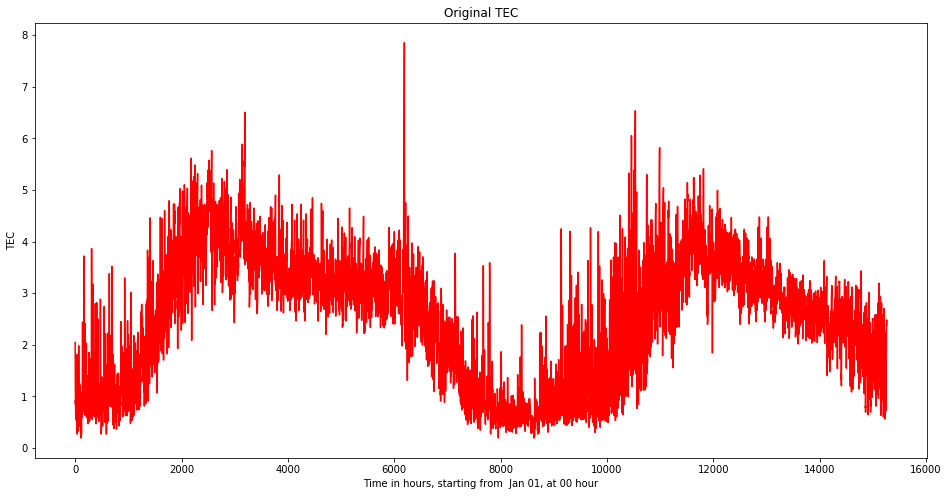

In [14]:
#plot the entire TEC
plt.figure(figsize=(16,8))
plt.plot(data_All['pixelTEC'], 'r')
plt.ylabel('TEC')
plt.title('Original TEC')
plt.xlabel('Time in hours, starting from  Jan 01, at 00 hour')

In [15]:
df_TEC.shape

(15264, 12)

In [16]:
df_Train=df_TEC[:15191]
df_Test=df_TEC[15191:]

In [17]:
model=Prophet(yearly_seasonality=True,
              weekly_seasonality=False,
              daily_seasonality=False).add_seasonality(name="daily",
                                                             period=6,
                                                             fourier_order=24)

In [18]:
model.add_regressor("nmf2")
model.add_regressor("hmf2")
model.add_regressor("SWspeed")
model.add_regressor("F10.7")
model.add_regressor("Dst")
model.add_regressor("AP_i")
model.add_regressor("AE_i")
model.add_regressor("KP_i")
model.add_regressor("AL_i")
model.add_regressor("AU_i")

In [19]:
model.fit(df_Train)

In [20]:
future=model.make_future_dataframe(freq='H',periods=72)

In [21]:
#Add regressors
future['nmf2']=df_TEC['nmf2']
future['hmf2']=df_TEC['hmf2']
future['SWspeed']=df_TEC['SWspeed']
future['F10.7']=df_TEC['F10.7']
future['Dst']=df_TEC['Dst']
future["AP_i"]=df_TEC["AP_i"]
future["AE_i"]=df_TEC["AE_i"]
future["KP_i"]=df_TEC["KP_i"]
future["AL_i"]=df_TEC["AL_i"]
future["AU_i"]=df_TEC["AU_i"]

In [22]:
future.head()

,ds,nmf2,hmf2,SWspeed,F10.7,Dst,AP_i,AE_i,KP_i,AL_i,AU_i
0,2014-01-01 00:00:00,0.706727,320.04242,399.0,154.3,4,7,25.0,3,-15.0,10.0
1,2014-01-01 01:00:00,0.568964,318.61392,395.0,154.3,3,7,36.0,3,-25.0,11.0
2,2014-01-01 02:00:00,0.445705,324.48035,386.0,154.3,1,7,33.0,3,-12.0,21.0
3,2014-01-01 03:00:00,0.447220,328.55225,376.0,154.3,1,13,57.0,5,-18.0,40.0
4,2014-01-01 04:00:00,0.413962,333.63202,372.0,154.3,-1,13,112.0,5,-35.0,77.0


In [23]:
future.tail()

,ds,nmf2,hmf2,SWspeed,F10.7,Dst,AP_i,AE_i,KP_i,AL_i,AU_i
15258,2015-09-30 18:00:00,0.807334,262.04694,303.0,131.5,9,3,36.0,2,-22.0,14.0
15259,2015-09-30 19:00:00,0.811347,263.40442,304.0,131.5,8,3,29.0,2,-13.0,16.0
15260,2015-09-30 20:00:00,0.812229,265.36963,297.0,131.5,10,3,37.0,2,-19.0,19.0
15261,2015-09-30 21:00:00,0.808226,268.36154,299.0,131.5,9,7,29.0,3,-11.0,18.0
15262,2015-09-30 22:00:00,0.797122,272.41460,298.0,131.5,9,7,26.0,3,-9.0,17.0


In [24]:
future.shape

(15263, 11)

In [25]:
pred=model.predict(future)

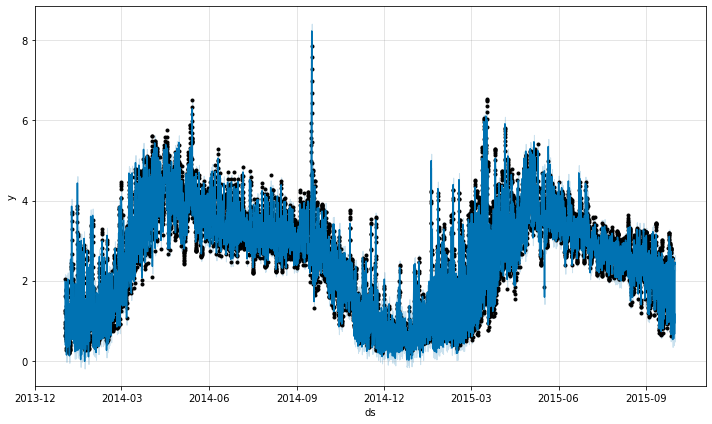

In [26]:
fig=model.plot(pred)

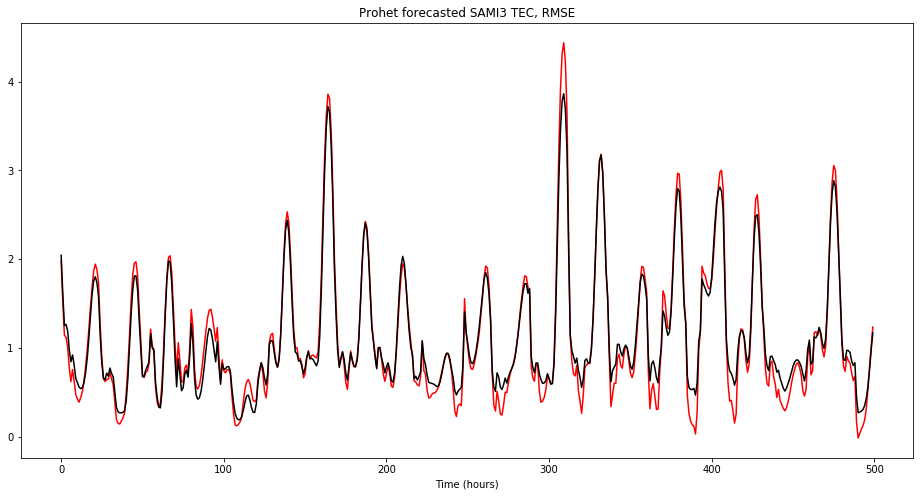

In [27]:
#Plot the first 500 training instances and forecasts
xticks=future[0:500]['ds'].values[0]
plt.figure(figsize=(16,8))
plt.plot(pred['yhat'][0:500],'r')
plt.plot(df_TEC['y'][0:500],'k')
plt.xlabel('Time (hours)')
plt.title('Prohet forecasted SAMI3 TEC, RMSE')
plt.rcParams.update({'font.size': 16,'lines.linewidth':1.5})

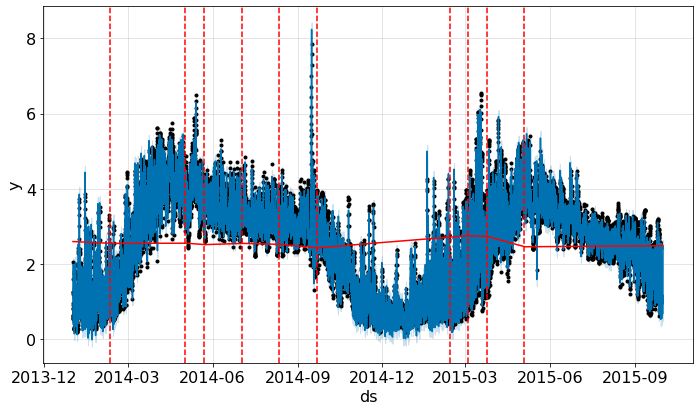

In [28]:
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(pred)
a = add_changepoints_to_plot(fig.gca(), model,pred)


In [ ]:
#plot the last 72 hour actual and forecast
i_corr = np.corrcoef(pred['yhat'][15191:], df_Test['y'][0:72])
plt.figure(figsize=(16,8))
plt.plot(pred['yhat'][15191:].values,'-.r',label='forecast')
plt.plot(df_Test['y'][0:72].values,'-.k',label='actual')
plt.title('Prophet forecasted SAMI3 TEC:  regressors added, Correlation: {}'.format(round(i_corr[0,1],2)))
plt.legend()
plt.rcParams.update({'font.size': 16,'lines.linewidth':1.5})
plt.savefig('HMF2ForecastALLAdded.png',format='png')

Conclusion, we clearly see that the the 72 hour in advance forecast of the TEC is produced with high accuracy of (correlation coefficient 0.99).